- Nesterov accelerated gradient（NAG）
- Adagrad
- Adaptive Moment Estimation (Adam)

http://www.sohu.com/a/131923387_473283

# Lab2: Regression Classfication and Stochastic Gradient Descent

## Step1: Import and devide dataset.

In [128]:
from numpy import *
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

train_features, train_targets = load_svmlight_file("a9a", n_features=123)
test_features, test_targets = load_svmlight_file("a9a.t", n_features=123)

train_targets =  train_targets.reshape(train_targets.shape[0],1)
test_targets =  test_targets.reshape(test_targets.shape[0],1)

# train_targets[train_targets == -1] = 0
# test_targets[test_targets == -1] = 0
shape(train_features)

(32561, 123)

## Step2: Initialize SVM model parameters

In [129]:
import numpy as np

theta = np.ones((train_features.shape[1], 1))
maxIteration = 100
c = 0.5
learning_rate = 0.1

## Step3: Gradient function, loss funciton and accuracy function

In [130]:
# # x_todense_T数组存储了x[i].todense().T的值，减少了重复计算量，提高运算速度
# x_todense_T = []
# for i in range(train_features.shape[0]):
#     x_todense_T.append(train_features[i].todense().T)

def cal_hinge_loss_and_grad(theta,x,y):
    loss,grad = 0,0
    for j in range(x.shape[0]):
        v = y[j]*((theta.T).dot(x_todense_T[j])[0,0])
        loss += max(0,1-v)
        grad += 0 if v > 1 else -y[j]*x[j].todense()
    return (loss/x.shape[0],grad)

def cal_stochastic_gradient(theta):
    grad = np.zeros((train_features.shape[1]))
    while (grad.sum() == 0):
        j = random.randint(0,train_features.shape[0])
#     grad = np.multipy(train_features[j], train_targets[j])
#     grad = train_features[j] * train_targets[j]
        train_targets_matrix_j = train_targets[j].reshape(1,1)
        grad = - train_targets_matrix_j * train_features[j] 
    return (grad)

def cal_hinge_loss(theta,x,y):
    loss = 0
    for j in range(x.shape[0]):
        v = y[j]*((theta.T).dot(x[j].todense().T)[0,0])
        loss += max(0,1-v)
    return loss/x.shape[0]

def cal_accur(x,y,theta):
    hypothesis = x * theta
    hypothesis[hypothesis > 0] = 1
    hypothesis[hypothesis <= 0] = -1
    return np.count_nonzero(hypothesis == y)/ x.shape[0]

train_loss, evaluation_loss, train_accr, evaluation_accr = [],[],[],[]

def gradientDescent(w):
    for i in range(maxIteration):
#         current_train_loss, gradient = cal_hinge_loss_and_grad(w,train_features,train_targets)
        gradient = cal_stochastic_gradient(w)
#         print(gradient)
#         w = w-learning_rate*gradient.T
        w = w - learning_rate*gradient
        if(i%10 == 0):
            train_loss.append(cal_hinge_loss(w,train_features,train_targets))
#         evaluation_loss.append( cal_hinge_loss(w,test_features,test_targets))
            train_accr.append(cal_accur(train_features,train_targets,w))
#         evaluation_accr.append(cal_accur(test_features,test_targets,w))
            print("Iteration ;", i)
        
gradientDescent(theta)


Iteration ; 0
Iteration ; 10
Iteration ; 20
Iteration ; 30
Iteration ; 40
Iteration ; 50
Iteration ; 60
Iteration ; 70
Iteration ; 80
Iteration ; 90


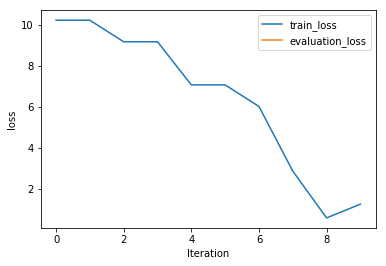

In [132]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot( train_loss, label="train_loss")
plt.plot( evaluation_loss,label="evaluation_loss" )
plt.legend(loc="upper right")

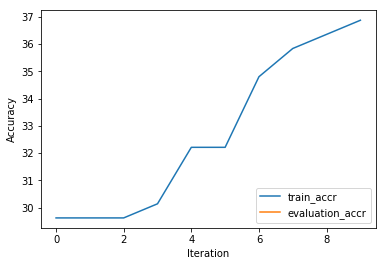

In [133]:
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(train_accr, label="train_accr")
plt.plot(evaluation_accr, label="evaluation_accr")
plt.legend(loc="lower right")